## Image Access Methods

In [1]:
import tensorflow
import numpy
from matplotlib import pyplot
import cv2
import os
import random
import pickle

In [6]:
file_name="../Data/Main_Data/Training_Data/Melanoma/atypical-nevi-8.jpg"

In [53]:
image_using_Open_CV=cv2.imread(file_name)

In [54]:
image_using_Open_CV

array([[[103, 108, 163],
        [143, 148, 203],
        [145, 152, 207],
        ...,
        [ 74,  86, 122],
        [101, 109, 146],
        [114, 122, 159]],

       [[157, 162, 217],
        [168, 175, 230],
        [141, 148, 203],
        ...,
        [ 71,  83, 119],
        [ 92, 101, 138],
        [103, 112, 149]],

       [[189, 197, 250],
        [167, 175, 228],
        [131, 139, 192],
        ...,
        [ 71,  83, 119],
        [ 85,  97, 133],
        [ 99, 111, 147]],

       ...,

       [[104, 120, 167],
        [108, 124, 171],
        [ 97, 111, 159],
        ...,
        [ 62,  79, 112],
        [ 65,  80, 113],
        [ 73,  88, 121]],

       [[ 99, 115, 162],
        [105, 121, 168],
        [ 99, 113, 161],
        ...,
        [ 62,  79, 112],
        [ 61,  78, 111],
        [ 67,  84, 117]],

       [[114, 130, 177],
        [110, 126, 173],
        [116, 130, 178],
        ...,
        [ 68,  85, 118],
        [ 63,  80, 113],
        [ 62,  79, 112]]

In [55]:
image_using_Open_CV.shape

(472, 720, 3)

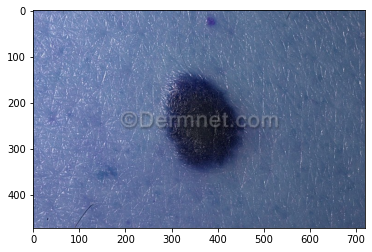

In [56]:
pyplot.imshow(image_using_Open_CV)

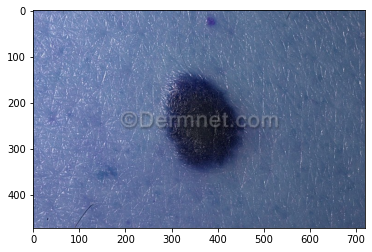

In [57]:
pyplot.imshow(image_using_Open_CV)

In [58]:
image_using_Open_CV=cv2.resize(image_using_Open_CV,(180,180))

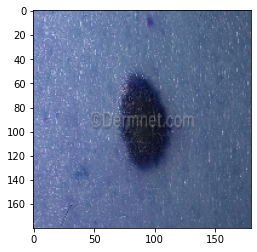

In [59]:
pyplot.imshow(image_using_Open_CV)

In [60]:
image_using_Open_CV=cv2.cvtColor(image_using_Open_CV,cv2.COLOR_BGR2RGB)

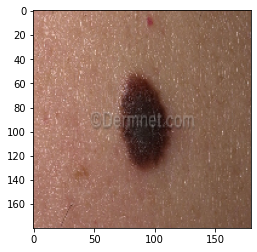

In [61]:
pyplot.imshow(image_using_Open_CV)

In [62]:
image_using_Open_CV.shape

(180, 180, 3)

In [63]:
numpy.expand_dims(image_using_Open_CV,axis=0).shape

(1, 180, 180, 3)

## Final Selected Method

In [66]:
import os
training_data_path="../Data/Main_Data/Training_Data"
testing_data_path="../Data/Main_Data/Testing_Data"


In [67]:
os.listdir(training_data_path)

['Melanoma', 'Normal']

In [68]:
categories=os.listdir(training_data_path)

In [69]:
categories

['Melanoma', 'Normal']

In [72]:
Total_Training_Data=[]

In [73]:

counter=0
for category in categories:
    category_path=os.path.join(training_data_path,category)
    class_index=categories.index(category)
    for image in os.listdir(category_path):
        counter+=1
        try:
            image_array=cv2.imread(os.path.join(category_path,image),cv2.IMREAD_GRAYSCALE)
            image_array=cv2.resize(image_array,(180,180))
            Total_Training_Data.append([image_array/255,class_index])
        except Exception as e:
            pass
#             print(e)
#             break
    print(category)


Melanoma
Normal


In [74]:
len(Total_Training_Data)

186

In [75]:
random.shuffle(Total_Training_Data)

In [76]:
Training_Data=[]
Training_Class=[]
for image_array_value,category_class in Total_Training_Data:
    Training_Data.append(image_array_value)
    Training_Class.append(category_class)

In [77]:
len(Training_Data)

186

In [78]:
len(Training_Class)

186

In [79]:
features=numpy.array(Training_Data)

In [80]:
features.shape

(186, 180, 180)

In [81]:
features.reshape(-1,180,180,1).shape

(186, 180, 180, 1)

In [82]:
features.shape

(186, 180, 180)

In [83]:
labels=Training_Class

In [84]:
pickle_fetures=open("../Data/Object_Data/pickle_fetures.pickle","wb")
pickle.dump(features,pickle_fetures)
pickle_fetures.close()

In [85]:
pickle_labels=open("../Data/Object_Data/pickle_labels.pickle","wb")
pickle.dump(labels,pickle_labels)
pickle_labels.close()

In [86]:
testing_categories=os.listdir(testing_data_path)
Total_Testing_data=[]

for testing_category in testing_categories:
    testing_category_path=os.path.join(testing_data_path,testing_category)
    class_index=testing_categories.index(testing_category)
    for image in os.listdir(testing_category_path):
        try:
            image_array=cv2.imread(os.path.join(testing_category_path,image),cv2.IMREAD_GRAYSCALE)
            image_array=cv2.resize(image_array,(180,180))
            Total_Testing_data.append([image_array/255,class_index])
        except Exception as e:
            pass
#             print(e)
#             break
    print(testing_category)


Melanoma
Normal


In [87]:
random.shuffle(Total_Testing_data)

In [88]:
Testing_Data=[]
Testing_Class=[]
for image_array_value,category_class in Total_Testing_data:
    Testing_Data.append(image_array_value)
    Testing_Class.append(category_class)

In [89]:
len(Testing_Data)

55

In [90]:
len(Testing_Class)

55

In [91]:
testing_features=numpy.array(Testing_Data)

In [92]:
testing_features.shape

(55, 180, 180)

In [93]:
pickle_testing_fetures=open("../Data/Object_Data/pickle_testing_fetures.pickle","wb")
pickle.dump(testing_features,pickle_testing_fetures)
pickle_testing_fetures.close()

pickle_testing_labels=open("../Data/Object_Data/pickle_testing_labels.pickle","wb")
pickle.dump(Testing_Class,pickle_testing_labels)
pickle_testing_labels.close()